# Lab | API wrappers - Create your collection of songs & audio features (GNOD - part 3)

In [1]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))

In [2]:
secrets_file = open("secret.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['CDI'],
                                                           client_secret=secrets_dict['Secret']))

In [6]:
# we will use our 'first paid music' playlist as an example:
playlist = sp.user_playlist_tracks("spotify", "32lPilIPcRVIDxlMdqEsCQ")

In [7]:
# Let's look at items and total:
playlist.keys() 

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [8]:
playlist["total"] 

1212

In [9]:
#first we need to get a list of individual tracks from the playlist
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [10]:
def get_name_artists_from_playlist(input_playlist):
    return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [11]:
def get_name_artists_from_playlist(input_playlist):
    return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

# Function to extract all songs from a playlist


In [12]:
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from pandas import json_normalize
import pandas as pd

In [13]:
def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
        sleep(randint(1,3))

    return tracks

In [14]:
first_playlist=get_playlist_tracks("32lPilIPcRVIDxlMdqEsCQ")
## importing list 

In [15]:
len(first_playlist) 

## checking list length 

1212

In [16]:
first_playlist[33]['track']

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3wury2nd8idV4GecUg5xze'},
    'href': 'https://api.spotify.com/v1/artists/3wury2nd8idV4GecUg5xze',
    'id': '3wury2nd8idV4GecUg5xze',
    'name': 'Primal Scream',
    'type': 'artist',
    'uri': 'spotify:artist:3wury2nd8idV4GecUg5xze'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/4TECsw2dFHZ1ULrT7OA3OL'},
  'href': 'https://api.spotify.com/v1/albums/4TECsw2dFHZ1ULrT7OA3OL',
  'id': '4TECsw2dFHZ1ULrT7OA3OL',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27339079cace7c6da79d6376a10',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0239079cace7c6da79d6376a10',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485139079cace7c6da79d6376a10',
    'width': 64}],
  'is_playable': True,
  'name': 

In [17]:
## checking elements as requested 

playlist["items"][33]["track"]["id"]

'2Z0X7jTNkYjpehGET2vnHE'

In [18]:
len(playlist["items"][33]['track']['artists'][0]["name"])

13

In [19]:
playlist["items"][33]['track']['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3wury2nd8idV4GecUg5xze'},
 'href': 'https://api.spotify.com/v1/artists/3wury2nd8idV4GecUg5xze',
 'id': '3wury2nd8idV4GecUg5xze',
 'name': 'Primal Scream',
 'type': 'artist',
 'uri': 'spotify:artist:3wury2nd8idV4GecUg5xze'}

In [20]:
def getSongInfo(playlist):
    all_info = []
    i=0

    for i in range(len(playlist)):
        song_dict = {}
        songtitle = []
        songuri = []
        artists = []
        audio_features = []
        songtitle.append(playlist[i]['track']["name"]) 
        songuri.append(playlist[i]['track']["id"]) 
        artists.append(playlist[i]['track']['artists'][0]["name"]) 
        audio_features.append(sp.audio_features(playlist[i]['track']["id"])) 

        song_dict['title'] = songtitle
        song_dict['artists'] = artists
        song_dict['uri'] = songuri
        song_dict["audio_features"]=audio_features
        all_info.append(song_dict)
        
    return all_info

In [21]:
playlist1=getSongInfo(first_playlist)
## extract data from dic

In [113]:
import pandas as pd
df = pd.DataFrame(playlist1)

## create first df

In [114]:
df1=pd.json_normalize(df["audio_features"], 0)

### normalized to all raws level 0 

In [115]:
df

,title,artists,uri,audio_features
0,[More Women],[Saâda Bonaire],[2as3FqzSwznnpRIIukn0Rw],"[[{'danceability': 0.82, 'energy': 0.549, 'key..."
1,[Sunrays],[The Other People Place],[46NmN9EgRufJgORAihnwWG],"[[{'danceability': 0.92, 'energy': 0.472, 'key..."
2,[Sweet Thing - 2015 Remaster],[Van Morrison],[7rPsF218CASDaDEoMkEe03],"[[{'danceability': 0.509, 'energy': 0.42, 'key..."
3,[Think Twice],[Donald Byrd],[1vq6x0VSLtVUHMbNKHh9sF],"[[{'danceability': 0.551, 'energy': 0.828, 'ke..."
4,[Space Age Love Song],[A Flock Of Seagulls],[7zSAI7Ae6DPVepN8MksKVZ],"[[{'danceability': 0.447, 'energy': 0.744, 'ke..."
...,...,...,...,...
1207,[These Dreams],[Heart],[22wWxHGHRH8gZXNDXRgSqY],"[[{'danceability': 0.535, 'energy': 0.532, 'ke..."
1208,[Hold Me Tighter In the Rain],[Billy Griffin],[2JpZ3Q9KCXZWuoz5PnsHPI],"[[{'danceability': 0.739, 'energy': 0.505, 'ke..."
1209,[I Can Love You],[Mary J. Blige],[4MTHIKGWNTBoubzDMkXFfa],"[[{'danceability': 0.635, 'energy': 0.614, 'ke..."
1210,[Stop Fantasy],[Plustwo],[2XV72ZpIs4BNeS01fvv3IG],"[[{'danceability': 0.834, 'energy': 0.551, 'ke..."


In [25]:
df1=df1.drop(columns=['uri', 'id','type'])
## not needed 

In [26]:
df=df.drop(columns=['audio_features'])
## not needed 

In [27]:
lastdf= pd.concat([df, df1], axis=1)


In [28]:
lastdf

## last concat df with removed doubles and not relevanz columns

,title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
0,[More Women],[Saâda Bonaire],[2as3FqzSwznnpRIIukn0Rw],0.820,0.549,9,-10.208,1,0.0673,0.635000,0.438000,0.0738,0.861,101.547,https://api.spotify.com/v1/tracks/2as3FqzSwznn...,https://api.spotify.com/v1/audio-analysis/2as3...,310427,4
1,[Sunrays],[The Other People Place],[46NmN9EgRufJgORAihnwWG],0.920,0.472,11,-11.698,1,0.2240,0.166000,0.830000,0.0657,0.941,126.033,https://api.spotify.com/v1/tracks/46NmN9EgRufJ...,https://api.spotify.com/v1/audio-analysis/46Nm...,495813,4
2,[Sweet Thing - 2015 Remaster],[Van Morrison],[7rPsF218CASDaDEoMkEe03],0.509,0.420,4,-12.866,1,0.0334,0.204000,0.000862,0.2930,0.687,86.805,https://api.spotify.com/v1/tracks/7rPsF218CASD...,https://api.spotify.com/v1/audio-analysis/7rPs...,262253,3
3,[Think Twice],[Donald Byrd],[1vq6x0VSLtVUHMbNKHh9sF],0.551,0.828,5,-9.371,0,0.0353,0.209000,0.036300,0.0764,0.802,108.070,https://api.spotify.com/v1/tracks/1vq6x0VSLtVU...,https://api.spotify.com/v1/audio-analysis/1vq6...,372133,4
4,[Space Age Love Song],[A Flock Of Seagulls],[7zSAI7Ae6DPVepN8MksKVZ],0.447,0.744,2,-4.613,1,0.0311,0.000036,0.106000,0.2100,0.552,139.959,https://api.spotify.com/v1/tracks/7zSAI7Ae6DPV...,https://api.spotify.com/v1/audio-analysis/7zSA...,226693,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,[These Dreams],[Heart],[22wWxHGHRH8gZXNDXRgSqY],0.535,0.532,11,-9.865,1,0.0291,0.508000,0.000000,0.0868,0.300,79.106,https://api.spotify.com/v1/tracks/22wWxHGHRH8g...,https://api.spotify.com/v1/audio-analysis/22wW...,254476,4
1208,[Hold Me Tighter In the Rain],[Billy Griffin],[2JpZ3Q9KCXZWuoz5PnsHPI],0.739,0.505,10,-11.993,0,0.0299,0.142000,0.116000,0.0745,0.511,102.737,https://api.spotify.com/v1/tracks/2JpZ3Q9KCXZW...,https://api.spotify.com/v1/audio-analysis/2JpZ...,329813,4
1209,[I Can Love You],[Mary J. Blige],[4MTHIKGWNTBoubzDMkXFfa],0.635,0.614,7,-7.165,1,0.1970,0.017900,0.000201,0.4150,0.736,174.213,https://api.spotify.com/v1/tracks/4MTHIKGWNTBo...,https://api.spotify.com/v1/audio-analysis/4MTH...,286400,4
1210,[Stop Fantasy],[Plustwo],[2XV72ZpIs4BNeS01fvv3IG],0.834,0.551,0,-6.760,0,0.0483,0.308000,0.037600,0.0540,0.770,114.049,https://api.spotify.com/v1/tracks/2XV72ZpIs4BN...,https://api.spotify.com/v1/audio-analysis/2XV7...,242701,4


In [29]:
lastdf.isnull().sum()
## checking for nulls

title               0
artists             0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [30]:
def createDFfromspotify(uri):

    first_playlist=get_playlist_tracks(uri)
    playlist1=getSongInfo(first_playlist)
    df = pd.DataFrame(playlist1)
    df1=pd.json_normalize(df["audio_features"], 0)
    df1=df1.drop(columns=['uri', 'id','type'])
    df=df.drop(columns=['audio_features'])
    lastdf= pd.concat([df, df1], axis=1)

    return lastdf

## collective function to work on other playlist if needed 

In [122]:
df3=createDFfromspotify("1gXVF6lRU2oweuheLXqVku")

## checkup worked 

HTTP Error for GET to https://api.spotify.com/v1/playlists/2PTPovqi4yYYvfhfXC0sJB/tracks with Params: {'limit': 100, 'offset': 0, 'fields': None, 'market': None, 'additional_types': 'track'} returned 404 due to Not found.


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/playlists/2PTPovqi4yYYvfhfXC0sJB/tracks?limit=100&offset=0&additional_types=track:
 Not found., reason: None

In [ ]:
df3=createDFfromspotify("1gXVF6lRU2oweuheLXqVku")


In [32]:
df4=createDFfromspotify("37i9dQZF1DWZIQpJDqCc10")

In [33]:
lastdf=pd.concat([df3, lastdf], ignore_index=True)

## concat df3

In [34]:
lastdf=pd.concat([df4, lastdf], ignore_index=True)

##concat df4

In [35]:
lastdf.to_csv('songs_colldf.csv', index=False)
## save to csv

In [36]:
from sklearn import datasets

In [37]:
# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


In [38]:
%timeit 
numDF=lastdf.select_dtypes(include=np.number)


In [39]:
numDF1=numDF.drop(columns=['duration_ms'])


In [40]:
numDF1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.502,0.941,7,-5.194,1,0.0716,0.000346,0.319000,0.5530,0.1240,119.783,4
1,0.604,0.789,5,-6.259,1,0.0273,0.001100,0.828000,0.3680,0.3480,122.032,4
2,0.429,0.661,11,-7.227,1,0.0281,0.002390,0.000121,0.2340,0.2850,173.372,4
3,0.509,0.331,4,-14.083,1,0.0267,0.272000,0.136000,0.1140,0.0957,96.848,4
4,0.603,0.784,6,-4.023,1,0.0620,0.446000,0.000008,0.1190,0.7690,172.041,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.535,0.532,11,-9.865,1,0.0291,0.508000,0.000000,0.0868,0.3000,79.106,4
2021,0.739,0.505,10,-11.993,0,0.0299,0.142000,0.116000,0.0745,0.5110,102.737,4
2022,0.635,0.614,7,-7.165,1,0.1970,0.017900,0.000201,0.4150,0.7360,174.213,4
2023,0.834,0.551,0,-6.760,0,0.0483,0.308000,0.037600,0.0540,0.7700,114.049,4


In [41]:
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(numDF1)
audio_feat_df = scaler.transform(numDF1)

# Now, all features will have the same weight.
pd.DataFrame(audio_feat_df,columns=numDF1.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.483170,1.315875,0.445271,0.929670,0.80562,0.216953,-0.727856,0.842493,2.549056,-1.746949,0.033089,0.192079
1,0.147022,0.598355,-0.115646,0.651752,0.80562,-0.612073,-0.724888,2.948855,1.298215,-0.825546,0.119433,0.192079
2,-0.934189,-0.005873,1.567105,0.399147,0.80562,-0.597102,-0.719810,-0.477103,0.392201,-1.084690,2.090494,0.192079
3,-0.439921,-1.563647,-0.396104,-1.389967,0.80562,-0.623301,0.341478,0.085196,-0.419156,-1.863359,-0.847439,0.192079
4,0.140843,0.574752,0.164813,1.235250,0.80562,0.037299,1.026409,-0.477569,-0.385349,0.906199,2.039394,0.192079


In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(audio_feat_df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

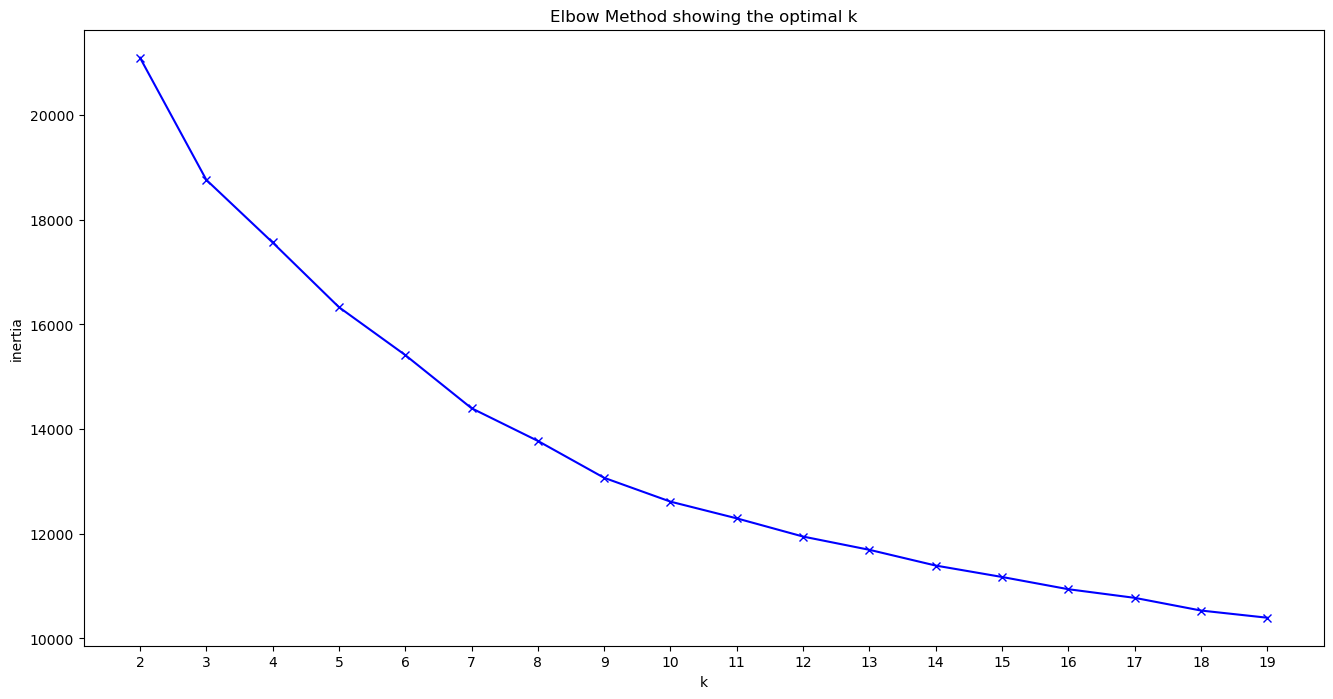

In [43]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_feat_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

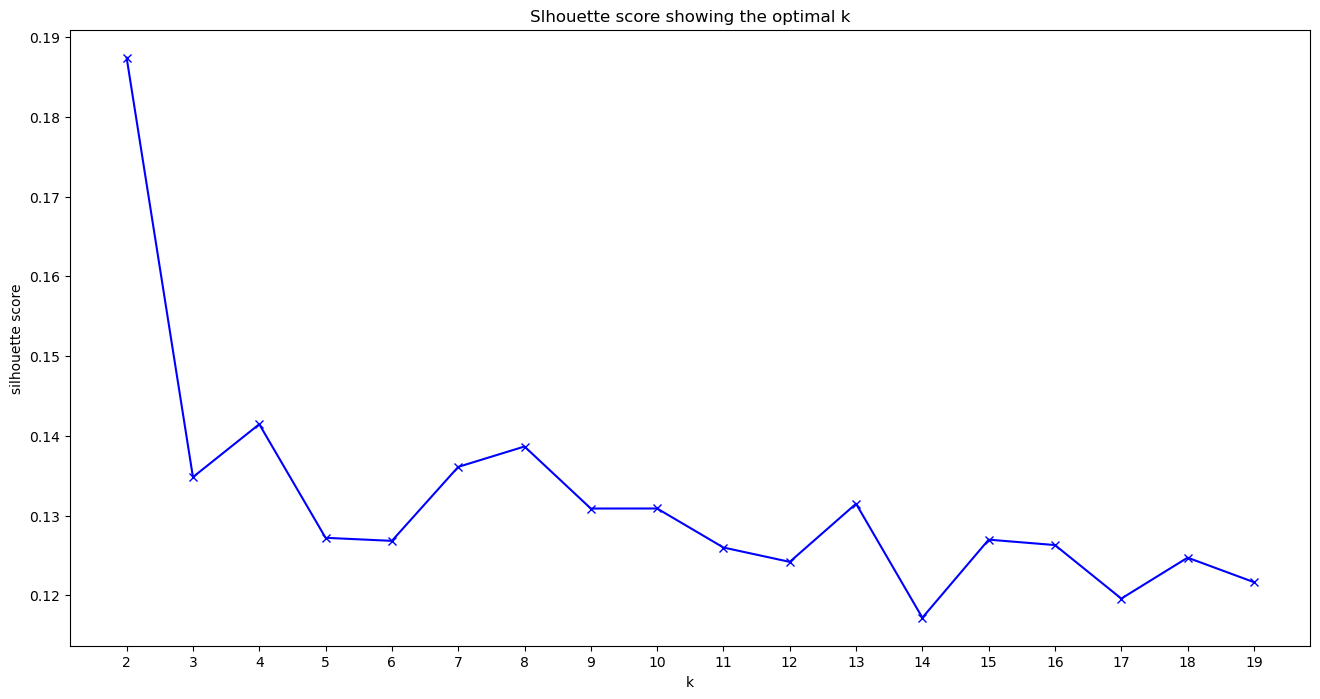

In [44]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_feat_df)
    silhouette.append(silhouette_score(audio_feat_df, kmeans.predict(audio_feat_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [212]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(audio_feat_df)

## tried the coluster with 11 

KMeans(n_clusters=11, random_state=1234)

In [213]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(audio_feat_df)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     300
1     212
2      97
3      98
4      88
5     195
6     307
7     166
8     291
9      48
10    223
dtype: int64

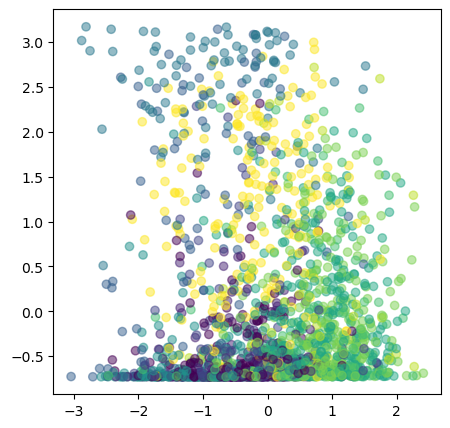

In [214]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.figure(figsize=(5, 5))
plt.scatter(audio_feat_df[:, 0], audio_feat_df[:, 6], c=clusters,alpha=0.5)
plt.show()

In [51]:
len(clusters)


2025

In [215]:
lastdf['cluster'] = clusters.tolist()


In [53]:
lastdf.to_csv('clustered_df.csv', index=False)


In [216]:
forrecomender=lastdf[["title","artists","uri","cluster"]]

In [233]:
forrecomender.to_csv('forrecomender.csv', index=False)


In [55]:
forrecomender

,title,artists,uri,cluster
0,[Maps],[Yeah Yeah Yeahs],[0hDQV9X1Da5JrwhK8gu86p],2
1,[Don't Delete The Kisses],[Wolf Alice],[3K94Fd5ZQkPCW8wV6oyk22],7
2,[Yellow],[Coldplay],[3AJwUDP919kvQ9QcozQPxg],5
3,[Nothing's Gonna Hurt You Baby],[Cigarettes After Sex],[3GhsBdS9ulPK3KCdwHRPhG],10
4,[Dark Red],[Steve Lacy],[3EaJDYHA0KnX88JvDhL9oa],5
...,...,...,...,...
2020,[These Dreams],[Heart],[22wWxHGHRH8gZXNDXRgSqY],10
2021,[Hold Me Tighter In the Rain],[Billy Griffin],[2JpZ3Q9KCXZWuoz5PnsHPI],6
2022,[I Can Love You],[Mary J. Blige],[4MTHIKGWNTBoubzDMkXFfa],5
2023,[Stop Fantasy],[Plustwo],[2XV72ZpIs4BNeS01fvv3IG],6


In [56]:
# save the model
import pickle
kmeans_model = 'kmeans_model.sav'
pickle.dump(kmeans, open(kmeans_model, 'wb'))

In [57]:
scaler_file = 'standard_scaler.sav'
pickle.dump(scaler, open(scaler_file, 'wb'))

In [231]:

query="radio gaga"
results = sp.search(q=query, type="track", limit=1, offset=0)




In [106]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=radio+gaga&type=track&offset=0&limit=1',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0MH2EWunWH5nnn4T7VsD6F'},
       'href': 'https://api.spotify.com/v1/artists/0MH2EWunWH5nnn4T7VsD6F',
       'id': '0MH2EWunWH5nnn4T7VsD6F',
       'name': 'Tickled Ivories',
       'type': 'artist',
       'uri': 'spotify:artist:0MH2EWunWH5nnn4T7VsD6F'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY

In [109]:
boom=results["tracks"]["items"][0]["id"]
boom



'2LQ7tqvkh1vPooN6fopypC'

In [191]:
dick=sp.audio_features(boom)[0]
dick
dick=pd.DataFrame([dick])
dick

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.31,0.143,5,-21.533,1,0.0732,0.993,0.945,0.11,0.121,73.303,audio_features,2LQ7tqvkh1vPooN6fopypC,spotify:track:2LQ7tqvkh1vPooN6fopypC,https://api.spotify.com/v1/tracks/2LQ7tqvkh1vP...,https://api.spotify.com/v1/audio-analysis/2LQ7...,359405,5


In [192]:



dick.drop(dick.columns.difference(['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']), axis = 1, inplace = True)



In [203]:
dick

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.31,0.143,5,-21.533,1,0.0732,0.993,0.945,0.11,0.121,73.303,5


In [209]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(audio_feat_df)

KMeans(n_clusters=11)

In [234]:
#Scale audio feature columns
audio_feat_df_corr_prep = scaler.transform(dick)

In [235]:
audio_feat_df_corr_prep

array([[-1.66941192, -2.45110644, -0.11564587, -3.33408873,  0.80561951,
         0.2468949 ,  3.1796114 ,  3.43302801, -0.44620084, -1.75928928,
        -1.75138539,  3.69622094]])

In [236]:
# Predicting / assigning the clusters:
clusters1 = kmeans.predict(audio_feat_df_corr_prep)

In [237]:
clusters1

array([4])

In [238]:
recomendedtrax=forrecomender[forrecomender['cluster'] == clusters1[0]].reset_index()

In [239]:
df = recomendedtrax.sample()


In [225]:
df



,index,title,artists,uri,cluster
70,1497,[Strange Feelin'],[Tim Buckley],[6X53ZMjsdLZ7B04WB6xqwt],3
